In [1]:
# Now, we are going to load the dataset! Here, I am going to be using
# the MNIST dataset. Scikit does us a favour of preparing testing & training data.
from sklearn.datasets import load_digits
digitdata = load_digits()

In [2]:
print("Hello World")

Hello World


In [3]:
# If we run this code, we can see that the data is filed as an Matrix using numpy!
type(digitdata.data)

numpy.ndarray

In [4]:
# However, this does not tell us the whole story. Let's look closer at the matrix, to see how high dimensional our data is!
(digitdata.data.shape, digitdata.target.shape, digitdata.images.shape)

((1797, 64), (1797,), (1797, 8, 8))

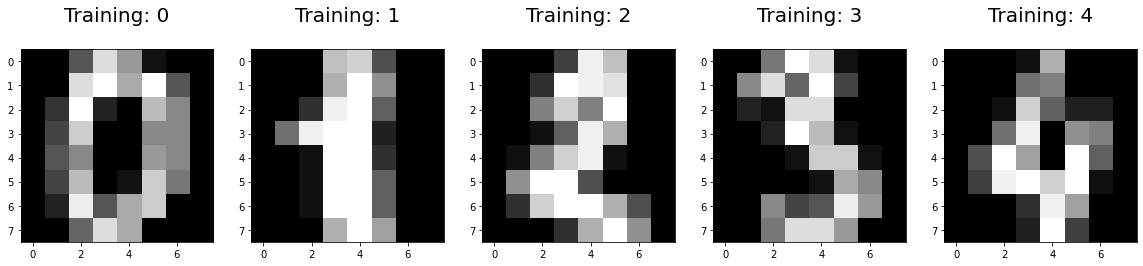

In [5]:
# From the above, we can see that our dataset contains 1797 images, each 8x8 in dimension and 1797 labels.
# So, each picture can be categorized as a 64 x 1 vector! The labels allow for us to classify each image. 
# Now, we can begin working on the data. 
# The code below will display some of the data for visualization!
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digitdata.data[0:5], 
                                           digitdata.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20);

In [6]:
# As we can see from above, we have shown 5 training images, showing 5 different digits from the dataset!
# Seeing as this is grayscale images, each pixel takes on some value between 0 and 225. 
# We can now begin to split these digits into both training and test data. 
# To do so, I again rely on the predefined test and training data given by Scikit!
# So,
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digitdata.data, 
                                                    digitdata.target,
                                                   test_size=0.25,
                                                   random_state=0)

In [7]:
# I will do the same procedure as before, by printing out the Size and Shape of both testing and training data
X_train.shape, X_test.shape

((1347, 64), (450, 64))

In [8]:
# So from above, we see that each image is still categorized as a 64x1 vector. The training data contains 1347 sample
# testing contains 450 sample
# For the purpose of this project, I am going to be testing logistic regression on this data, before and after
# dimension reduction methods. My hypothesis is that we will expect normal logistic regression to work best.
# Let's import the logistic regression from scikit!
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l2', #ridge regression, for more info please look at "Introduction to Statistical learning with R"
                        solver='saga',
                        max_iter=10000,
                        C=50)

In [9]:
# Now, let's print out the result of the above code, to see how exactly this logistic regression will work
clf

LogisticRegression(C=50, max_iter=10000, solver='saga')

In [10]:
# Now, lets test the model and see if the classifier detects the true number of labels. The answer should be 10!
clf.fit(X_train, y_train)
clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
# So, we have 10 labels successfully made. The shape of each label should still be searching for a 64x1 vector
# which is the image in vector form. This should look like (10,64) due to 10 labels, 64 pixel image
clf.coef_.shape


(10, 64)

In [12]:
# We can examine the weights closer for inspection. Let's look at the number 9 
clf.coef_[9].round(2)

array([ 0.  , -0.14, -0.12,  0.29,  0.32, -0.11, -0.02, -0.05, -0.  ,
        0.07,  0.14, -0.01, -0.18,  0.11,  0.18, -0.06, -0.  ,  0.08,
        0.  ,  0.22,  0.29,  0.59,  0.09, -0.04, -0.  , -0.04,  0.22,
        0.42,  0.14,  0.23, -0.12, -0.  ,  0.  , -0.39, -0.23,  0.28,
       -0.17,  0.03, -0.06,  0.  , -0.  ,  0.01, -0.53, -0.99, -0.56,
       -0.2 , -0.28,  0.  , -0.  ,  0.08, -0.14, -0.22, -0.25, -0.3 ,
       -0.06,  0.06, -0.  , -0.1 , -0.05,  0.09,  0.09, -0.02, -0.09,
        0.01])

In [13]:
# Now, let's examine the same, except for all classes!
clf.intercept_

array([ 0.00122624, -0.07279245,  0.0045658 ,  0.00456223,  0.04586385,
        0.00037241, -0.00430422,  0.01127957,  0.04341542, -0.03418885])

In [14]:
# We can view how long this process took, by calculating the number of iterations the software performed to reach
# the tolerance! 
clf.n_iter_[0]

1865

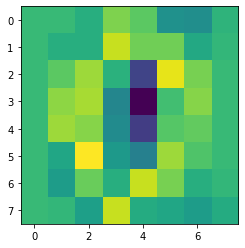

In [15]:
# So, we can now view these coefficients as an image, if we'd like!
coef = clf.coef_.copy()
plt.imshow(coef[0].reshape(8,8).round(2))
# However, this doesn't really capture anything for every class
# So, we can create a picture for the coefficients of each class, 10 in total

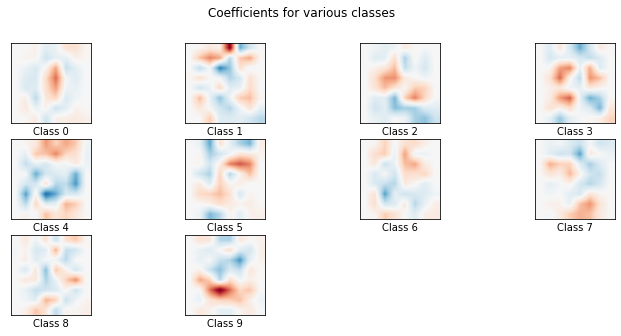

In [16]:
coef = clf.coef_.copy()
scale = np.abs(coef).max()
plt.figure(figsize=(12,5))

for i in range(10): # 0-9
    coef_plot = plt.subplot(3, 4, i + 1) # 2x5 plot

    coef_plot.imshow(coef[i].reshape(8,8), 
                     cmap=plt.cm.RdBu,
                     vmin=-scale, vmax=scale,
                    interpolation='bilinear')
    
    coef_plot.set_xticks(()); coef_plot.set_yticks(())
    coef_plot.set_xlabel(f'Class {i}')

plt.suptitle('Coefficients for various classes');

In [17]:
# Now, let's focus on the prediction of the MNIST data!

In [18]:
# We can do so by comparing the unknown against the truth!
print(clf.predict(X_test[0:9]))
print(y_test[0:9])
# We also need to score against the training and testing data
# So, 
clf.score(X_train, y_train) # training score

[2 8 2 6 6 7 1 9 8]
[2 8 2 6 6 7 1 9 8]


1.0

In [19]:
score = clf.score(X_test, y_test) # test score
score

0.9533333333333334

In [20]:
# So, we have 100% accuracy for the training data, and yet 95.5% for the testing score!
# not bad!
# Now, we begin on the Confusion matrix. 
# For reference, please visit https://en.wikipedia.org/wiki/Confusion_matrix
# We do this by using scikit package 
from sklearn import metrics
PredictionAccuracy = clf.predict(X_test)

cm = metrics.confusion_matrix(y_true=y_test, 
                         y_pred = PredictionAccuracy, 
                        labels = clf.classes_)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  1, 41,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 46,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 43,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 45]], dtype=int64)

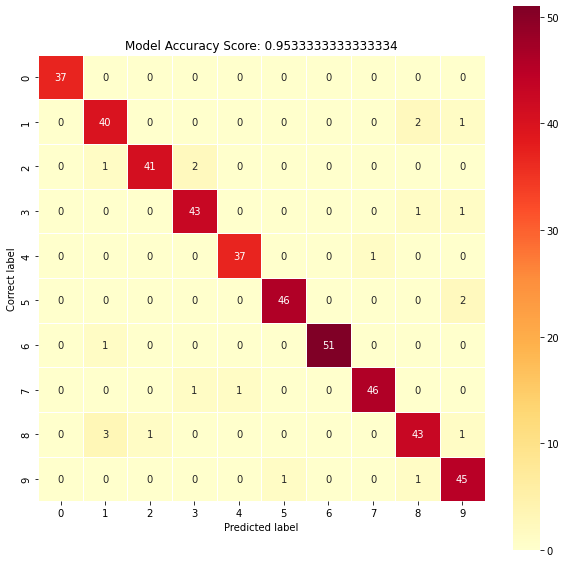

In [21]:
# The above diagram does not do our data a good representation
# So, let's import seaborn! This is a nice package for innovation and heatmaps
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, 
            linewidths=.5, square = True, cmap = 'YlOrRd');

plt.ylabel('Correct label')
plt.xlabel('Predicted label')
all_sample_title = 'Model Accuracy Score: {0}'.format(score)
plt.title(all_sample_title);

[56, 94, 118, 124, 130, 169, 181, 196, 213, 251, 315, 325, 331, 335, 378, 398, 415, 425, 429, 430, 440]


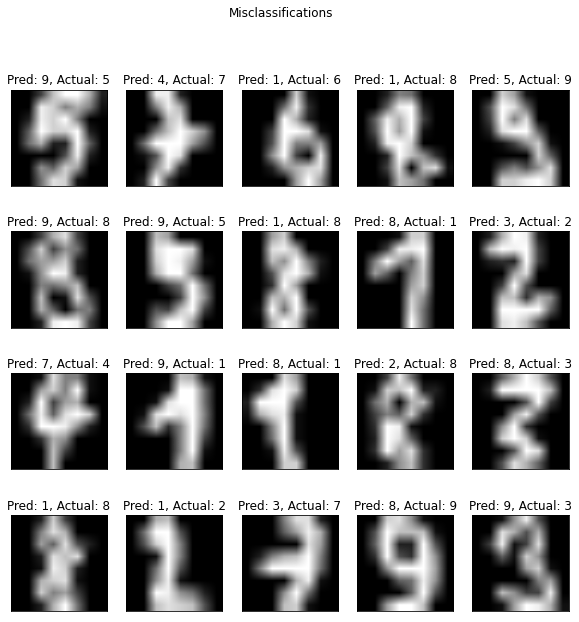

In [22]:
# Now, let's focus on the digits which were misclassified!
index = 0
misclassified_images = []
for label, predict in zip(y_test, PredictionAccuracy):
    if label != predict: 
        misclassified_images.append(index)
    index +=1
print(misclassified_images)

plt.figure(figsize=(10,10))
plt.suptitle('Misclassifications');

for plot_index, bad_index in enumerate(misclassified_images[0:20]):
    p = plt.subplot(4,5, plot_index+1)
    
    p.imshow(X_test[bad_index].reshape(8,8), cmap=plt.cm.gray,
            interpolation='bilinear')
    p.set_xticks(()); p.set_yticks(())
    
    p.set_title(f'Pred: {PredictionAccuracy[bad_index]}, Actual: {y_test[bad_index]}');